In [21]:
oboe_automl_path = '../../oboe/automl'
metafeature_folder_path = 'selected_OpenML_dataset_metafeatures'

In [22]:
import numpy as np
import pandas as pd
import sys
import re
import os
from sklearn.model_selection import LeaveOneOut
from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.ticker as ticker
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'weight': 'bold'})
rc('text', usetex=True)

sys.path.append(oboe_automl_path)

In [23]:
import linalg
import convex_opt
from sklearn.model_selection import LeaveOneOut
import multiprocessing

In [24]:
# D-optimal: 6.17s/it
# A-optimal: 8.75s/it
# E-optimal: 20.21s/it

In [25]:
# compare percentage

percentage_A = pd.read_csv("percentage_of_error_oboe_4_A.csv", index_col=None, header=None).values

percentage_D = pd.read_csv("percentage_of_error_oboe_4_D.csv", index_col=None, header=None).values

percentage_E = pd.read_csv("percentage_of_error_oboe_4_E.csv", index_col=None, header=None).values


In [26]:
np.average(percentage_A)

0.4343608929010247

In [27]:
np.average(percentage_D)

0.469194919470108

In [28]:
np.average(percentage_E)

0.31730454508311395

In [29]:
errmtx_common_no_error_oboe_A = pd.read_csv("errmtx_common_no_error_oboe_4_A.csv", index_col=None, header=None).values
errmtx_common_no_error_oboe_D = pd.read_csv("errmtx_common_no_error_oboe_4_D.csv", index_col=None, header=None).values
errmtx_common_no_error_oboe_E = pd.read_csv("errmtx_common_no_error_oboe_4_E.csv", index_col=None, header=None).values
errmtx_pred_no_error_oboe_A = pd.read_csv("errmtx_pred_no_error_oboe_4_A.csv", index_col=None, header=None).values
errmtx_pred_no_error_oboe_D = pd.read_csv("errmtx_pred_no_error_oboe_4_D.csv", index_col=None, header=None).values
errmtx_pred_no_error_oboe_E = pd.read_csv("errmtx_pred_no_error_oboe_4_E.csv", index_col=None, header=None).values

In [30]:
# compare number of best predicted models
A_ind_actual_best_five = np.argsort(np.argsort(errmtx_common_no_error_oboe_A, axis=1), axis=1)[:, :5]

A_ind_pred_best_five = np.argsort(np.argsort(errmtx_pred_no_error_oboe_A, axis=1), axis=1)[:, :5]

D_ind_actual_best_five = np.argsort(np.argsort(errmtx_common_no_error_oboe_D, axis=1), axis=1)[:, :5]

D_ind_pred_best_five = np.argsort(np.argsort(errmtx_pred_no_error_oboe_D, axis=1), axis=1)[:, :5]

E_ind_actual_best_five = np.argsort(np.argsort(errmtx_common_no_error_oboe_E, axis=1), axis=1)[:, :5]

E_ind_pred_best_five = np.argsort(np.argsort(errmtx_pred_no_error_oboe_E, axis=1), axis=1)[:, :5]

In [31]:
A_ind_overlap = [set(A_ind_actual_best_five[i, :]).intersection(set(A_ind_pred_best_five[i, :])) for i in range(A_ind_actual_best_five.shape[0])]

D_ind_overlap = [set(D_ind_actual_best_five[i, :]).intersection(set(D_ind_pred_best_five[i, :])) for i in range(D_ind_actual_best_five.shape[0])]

E_ind_overlap = [set(E_ind_actual_best_five[i, :]).intersection(set(E_ind_pred_best_five[i, :])) for i in range(E_ind_actual_best_five.shape[0])]

In [32]:
A_average_accuracy = np.average([len(item) for item in A_ind_overlap])

D_average_accuracy = np.average([len(item) for item in D_ind_overlap])

E_average_accuracy = np.average([len(item) for item in E_ind_overlap])

In [33]:
A_average_accuracy

0.8923444976076556

In [34]:
D_average_accuracy

1.0142517814726841

In [35]:
E_average_accuracy

0.8033573141486811

In [36]:
A_average_accuracy_list = []
D_average_accuracy_list = []
E_average_accuracy_list = []

for num_overlap in range(1, 11):
    A_ind_actual_best_several = np.argsort(np.argsort(errmtx_common_no_error_oboe_A, axis=1), axis=1)[:, :num_overlap]
    A_ind_pred_best_several = np.argsort(np.argsort(errmtx_pred_no_error_oboe_A, axis=1), axis=1)[:, :num_overlap]
    D_ind_actual_best_several = np.argsort(np.argsort(errmtx_common_no_error_oboe_D, axis=1), axis=1)[:, :num_overlap]
    D_ind_pred_best_several = np.argsort(np.argsort(errmtx_pred_no_error_oboe_D, axis=1), axis=1)[:, :num_overlap]
    E_ind_actual_best_several = np.argsort(np.argsort(errmtx_common_no_error_oboe_E, axis=1), axis=1)[:, :num_overlap]
    E_ind_pred_best_several = np.argsort(np.argsort(errmtx_pred_no_error_oboe_E, axis=1), axis=1)[:, :num_overlap]
    A_ind_overlap = [set(A_ind_actual_best_several[i, :]).intersection(set(A_ind_pred_best_several[i, :])) for i in range(A_ind_actual_best_several.shape[0])]
    D_ind_overlap = [set(D_ind_actual_best_several[i, :]).intersection(set(D_ind_pred_best_several[i, :])) for i in range(D_ind_actual_best_several.shape[0])]
    E_ind_overlap = [set(E_ind_actual_best_several[i, :]).intersection(set(E_ind_pred_best_several[i, :])) for i in range(E_ind_actual_best_several.shape[0])]

    A_average_accuracy = np.average([len(item) for item in A_ind_overlap])
    D_average_accuracy = np.average([len(item) for item in D_ind_overlap])
    E_average_accuracy = np.average([len(item) for item in E_ind_overlap])
    
    A_average_accuracy_list.append(A_average_accuracy)
    D_average_accuracy_list.append(D_average_accuracy)
    E_average_accuracy_list.append(E_average_accuracy)    

In [37]:
alors_errmtx_common_no_error = pd.read_csv("errmtx_common_alors_non_centering.csv", index_col=None, header=None).values
alors_errmtx_pred = pd.read_csv("errmtx_pred_alors_non_centering.csv", index_col=None, header=None).values
alors_percentage_of_error = pd.read_csv("percentage_of_error_alors_non_centering.csv", index_col=None, header=None).values

In [38]:
alors_average_accuracy_list = []

for num_overlap in range(1, 11):
    alors_ind_actual_best_several = np.argsort(np.argsort(alors_errmtx_common_no_error, axis=1), axis=1)[:, :num_overlap]
    alors_ind_pred_best_several = np.argsort(np.argsort(alors_errmtx_pred, axis=1), axis=1)[:, :num_overlap]
    alors_ind_overlap = [set(alors_ind_actual_best_several[i, :]).intersection(set(alors_ind_pred_best_several[i, :])) for i in range(alors_ind_pred_best_several.shape[0])]
    alors_average_accuracy = np.average([len(item) for item in alors_ind_overlap])
    alors_average_accuracy_list.append(alors_average_accuracy)

In [39]:
D_average_accuracy_percentage = np.array(D_average_accuracy_list)/np.arange(1, 11)
A_average_accuracy_percentage = np.array(A_average_accuracy_list)/np.arange(1, 11)
E_average_accuracy_percentage = np.array(E_average_accuracy_list)/np.arange(1, 11)
alors_average_accuracy_percentage = np.array(alors_average_accuracy_list)/np.arange(1, 11)

/home/cy438/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


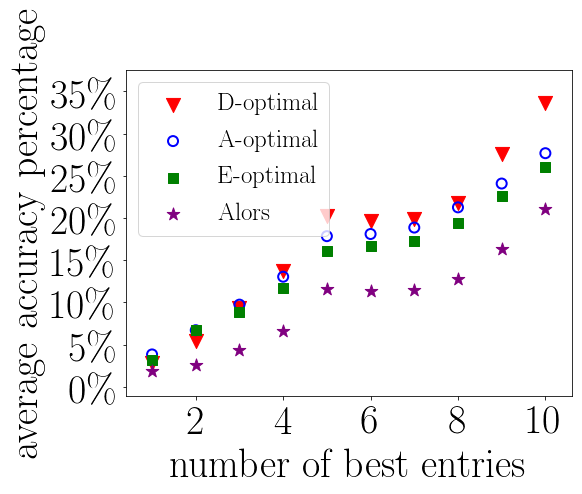

In [47]:
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'purple', 'indigo']
fontsize_axes = 40
legend_marker_size = 30

ax.scatter(np.linspace(1, 10, 10), D_average_accuracy_percentage, color=colors[0], marker='v', s=200, label='D-optimal')
ax.scatter(np.linspace(1, 10, 10), A_average_accuracy_percentage, color=colors[1], marker='o', facecolors="None", s=100, linewidth=2, label='A-optimal')
ax.scatter(np.linspace(1, 10, 10), E_average_accuracy_percentage, color=colors[2], marker='s', s=100, label='E-optimal')

ax.scatter(np.linspace(1, 10, 10), alors_average_accuracy_percentage, color=colors[3], marker='*', s=175, label='Alors')

ax.set_xlabel('number of best entries', fontsize=fontsize_axes)
ax.set_ylabel('average accuracy percentage', fontsize=fontsize_axes)
# ax.legend(loc='lower right', fontsize=legend_marker_size, bbox_to_anchor=(1.45, -0.05))
ax.legend(loc='upper left', fontsize=legend_marker_size - 5)
plt.xticks(fontsize=fontsize_axes)
plt.yticks(fontsize=fontsize_axes)
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

# plt.show()

plt.savefig('cold_start_no_COCA.pdf', bbox_inches='tight')